In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from fontTools.varLib.interpolatableHelpers import contour_vector_from_stats
from pyparsing import alphas
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [20]:
from sklearn.datasets import fetch_openml

In [21]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

In [24]:
df.to_pickle("data/boston.pkl")

In [16]:
boston=pickle.load(open("data/boston.pkl", "rb"))

In [25]:
pd.read_pickle("data/boston.pkl")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [26]:
boston.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [28]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [30]:
X=df.drop("MEDV", axis=1)

In [32]:
Y=df.MEDV

In [33]:
kf=KFold(shuffle=True,random_state=72018,n_splits=5)

In [34]:
kf.split(X)

<generator object _BaseKFold.split at 0x1420e6e40>

In [44]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()

pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

model = Pipeline([("pre", pre), ("lr", LinearRegression())])

In [45]:
for train_index, test_index in kf.split(X):
    print("train index:",train_index[:10],len(train_index))
    print("test index:",test_index[:10]),len(test_index)
    print('')

train index: [ 1  3  4  5  7  8 10 11 12 13] 404
test index: [ 0  2  6  9 19 26 29 32 41 49]

train index: [0 1 2 3 4 5 6 7 8 9] 405
test index: [15 17 23 25 27 35 38 46 53 54]

train index: [ 0  2  6  8  9 10 11 12 13 14] 405
test index: [ 1  3  4  5  7 16 22 30 34 39]

train index: [ 0  1  2  3  4  5  6  7  9 10] 405
test index: [ 8 11 14 33 36 37 51 55 61 65]

train index: [0 1 2 3 4 5 6 7 8 9] 405
test index: [10 12 13 18 20 21 24 28 31 42]



In [46]:
X.dtypes
X.select_dtypes(exclude=["number"]).columns

Index(['CHAS', 'RAD'], dtype='object')

In [47]:
X_train = X_train.apply(pd.to_numeric, errors="coerce")
X_test  = X_test.apply(pd.to_numeric, errors="coerce")

In [49]:
X_train.dtypes
X_train.select_dtypes(exclude=["number"]).columns

Index([], dtype='object')

In [50]:
scores=[]
lr=LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(r2_score(y_test.values, y_pred))
scores

/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_m

[0.7642726139148098,
 0.6528418569984233,
 0.6963712346363898,
 0.7477423886032006,
 0.6444406939304619]

In [52]:
scores=[]
lr=LinearRegression()
s=StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    X_train_scaled = s.fit_transform(X_train)
    lr.fit(X_train_scaled, y_train)

    X_test_scaled = s.transform(X_test)

    y_pred = lr.predict(X_test_scaled)
    scores.append(r2_score(y_test.values, y_pred))
scores

/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_m

[0.7608517622819878,
 0.633310007903749,
 0.6856478021367038,
 0.753273677101146,
 0.6627670125196186]

**Pipeline and cross_val_predict**

In [53]:
estimator=Pipeline([("scaler", StandardScaler()), ("regressor", LinearRegression())])
estimator.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [54]:
estimator.predict(X_test)

/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


array([19.15304234, 20.19796768, 19.70708698, 15.24749494, 12.52218507,
       17.96994037, 15.91219268, 19.82577732, 18.67138684, 24.27723121,
       23.52139532, 21.73405488, 18.08794357,  8.58316859, 27.15606004,
       21.36535398, 18.04324236, 20.4163324 , 16.80603144, 20.77777816,
       24.32436014, 25.86764347, 28.84446514, 20.37843324, 20.90966785,
       20.51606552, 23.21822685, 20.82256387, 16.35654665, 16.11585441,
       11.1761253 , 21.7383686 , 22.31975882, 23.85609979, 30.89194761,
       35.18033693, 23.45966607, 23.51706873, 34.5988726 , 32.04688832,
       40.07750814, 29.40255307, 35.92970383, 42.39131912, 23.39673305,
       23.05807563,  8.12017714, 24.14164553, 31.58998463, 34.04206983,
       26.82928447, 16.94437132, 23.10106158, 23.26871514, 28.28069804,
       37.28483394, 34.79342315, 21.69003935, 36.60768148, 34.94276854,
       26.84059321, 32.74122789, 18.20756419, 24.74668759, 24.84481352,
       22.83633682, 19.84927209, 30.0677528 , 27.81286131, 21.31

cross val

In [55]:
kf

KFold(n_splits=5, random_state=72018, shuffle=True)

In [56]:
predictions=cross_val_predict(estimator, X, Y, cv=kf)

/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_m

In [57]:
len(predictions)

506

In [60]:
r2_score(Y, predictions)

0.7058413407744246

In [62]:
np.mean(scores)

np.float64(0.6991700523886412)

# **Hyperparameters**

In [63]:
np.geomspace(1,27,4)

array([ 1.,  3.,  9., 27.])

In [64]:
alphas=np.geomspace(1e-9,1e0,num=10)

In [65]:
scores=[]
coefs=[]

for alpha in alphas:
    las=Lasso(alpha=alpha, max_iter=1000)
    estimator=Pipeline([("scaler", StandardScaler()), ("regressor", las)])

    predictions=cross_val_predict(estimator, X, Y, cv=kf)

    score=r2_score(Y, predictions)
    scores.append(score)

/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_m

In [66]:
list(zip(alphas, scores))

[(np.float64(1e-09), 0.7058413408380662),
 (np.float64(1e-08), 0.705841341419436),
 (np.float64(1e-07), 0.7058413471334761),
 (np.float64(1e-06), 0.7058414048138028),
 (np.float64(1e-05), 0.7058419759086801),
 (np.float64(0.0001), 0.7058477023412022),
 (np.float64(0.001), 0.7059054798590744),
 (np.float64(0.01), 0.706392430670407),
 (np.float64(0.1), 0.7038488776976338),
 (np.float64(1.0), 0.6476387126295542)]

In [67]:
Lasso(alpha=1e-6).fit(X, Y).coef_

array([-1.08011179e-01,  4.64205014e-02,  2.05572176e-02,  2.68671559e+00,
       -1.77662734e+01,  3.80986569e+00,  6.91965755e-04, -1.47556154e+00,
        3.06048723e-01, -1.23346231e-02, -9.52743587e-01,  9.31170075e-03,
       -5.24758940e-01])

In [68]:
Lasso(alpha=1).fit(X, Y).coef_


array([-0.06343729,  0.04916467, -0.        ,  0.        , -0.        ,
        0.9498107 ,  0.02090951, -0.66879   ,  0.26420643, -0.01521159,
       -0.72296636,  0.00824703, -0.76111454])

Text(0, 0.5, '$R^2$')

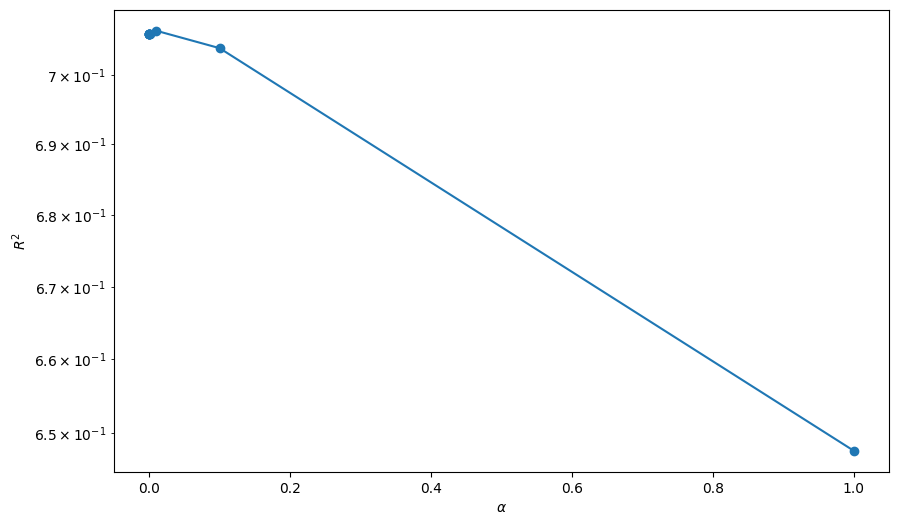

In [70]:
plt.figure(figsize=(10,6))
plt.semilogy(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$')

Pipeline

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("vt", VarianceThreshold(threshold=0.0)),        # drop zero-variance
    ("scaler", StandardScaler())                     # safe now (std>0 guaranteed)
])

# Force dense output from OHE so ColumnTransformer returns a dense array.
# (scikit-learn >=1.2 uses 'sparse_output'; for older versions use sparse=False)
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

pre = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
], remainder="drop")


scores=[]
coefs=[]

alphas=np.geomspace(0.001,10,10)

for alpha in alphas:
    las=Lasso(alpha=alpha, max_iter=100000)
    estimator=Pipeline([("make_higher_degree",pf),("scaler", StandardScaler()),("regressor", las)])

    predictions=cross_val_predict(estimator, X, Y, cv=kf)

    score=r2_score(Y, predictions)
    scores.append(score)

/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.373e+01, tolerance: 3.131e+00
  model = cd_fast.enet_coordinate_descent(
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linea

KeyboardInterrupt: 

/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/rahultomar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ 

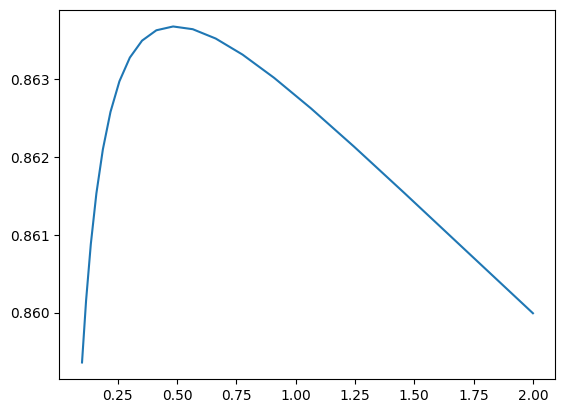

In [73]:
pf=PolynomialFeatures(degree=2)

scores=[]
coefs=[]

alphas=np.geomspace(0.1,2,20)

for alpha in alphas:
    ridge=Ridge(alpha=alpha, max_iter=100000)

    estimator=Pipeline([("make_higher_degree",pf),("scaler", StandardScaler()),("regressor", ridge)])

    predictions=cross_val_predict(estimator, X, Y, cv=kf)

    score=r2_score(Y, predictions)
    scores.append(score)
plt.plot(alphas, scores)